In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_pdf import PdfPages

import os
import random
import gc
import h5py

In [2]:
T = 100
#time = np.array(range(T))
time = np.arange(-5,5,0.1)

In [3]:
alpha = 0.985
def gain_function_(z):
    output = np.zeros(len(z))
    for i in range(len(z)):
        output[i] = alpha * math.log(1 + math.exp(z[i]/alpha))
    return output
#gain_function(self.J * u_ini * x_ini * E_ini + self.E_0_default - self.thre_effi * z_ini)

In [52]:
J_effect_0 = np.zeros(T)

In [53]:
J_effect_0 = gain_function_(time)

In [54]:
J_effect_1 = np.zeros(T)
J_effect_1 = gain_function_(time * 2.)

In [ ]:
dE_E = time

/Users/soliton/.pyenv/versions/anaconda3-4.2.0/envs/dynamicsenv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

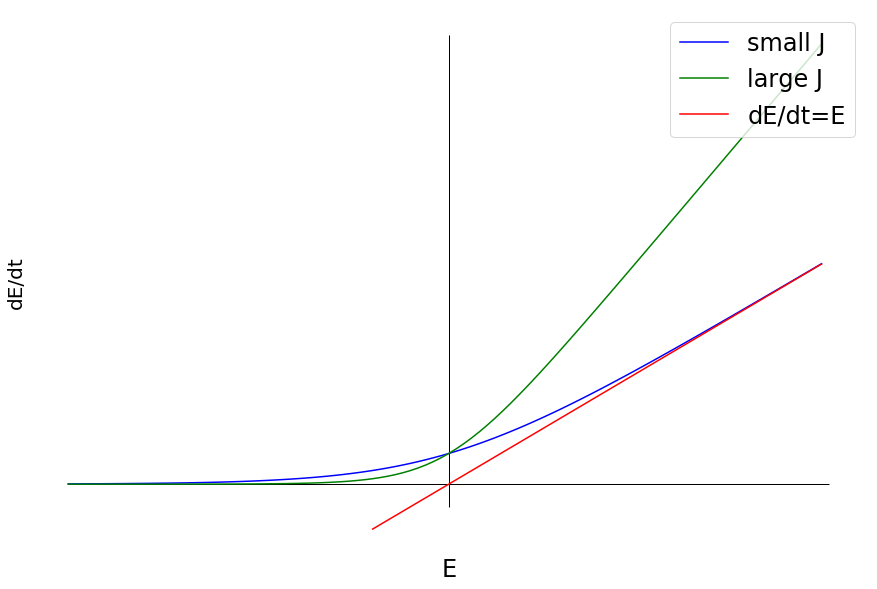

In [80]:
plt.clf()
pp = PdfPages('J_effect_with_E.pdf')
fig = plt.figure(figsize=(15,10))
plt.plot(time, J_effect_0, label="small J",color="blue")
plt.plot(time, J_effect_1, label = "large J",color="green")
plt.plot(time[40:], dE_E[40:], label = "dE/dt=E", color="red")
plt.legend(loc="upper right",fontsize=24)

plt.xlabel("E",fontsize=24)
plt.ylabel("dE/dt",fontsize=20)
plt.xticks(color="None")
plt.yticks(color="None")
#plt.tick_params(color)

ax = plt.gca()
ax.spines["right"].set_color("None")
ax.spines["left"].set_color("None")
ax.spines["bottom"].set_color("None")
ax.spines["top"].set_color("None")
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
#box("off")

#xticks = np.array([""])
plt.vlines([0],-0.5,10,linestyle="-",lw=1)
plt.hlines([0],-5,5,linestyle="-",lw=1)

plt.show()
pp.savefig(fig, bbox_inches="tight", pad_inches=0.0)
pp.close()

/Users/soliton/.pyenv/versions/anaconda3-4.2.0/envs/dynamicsenv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

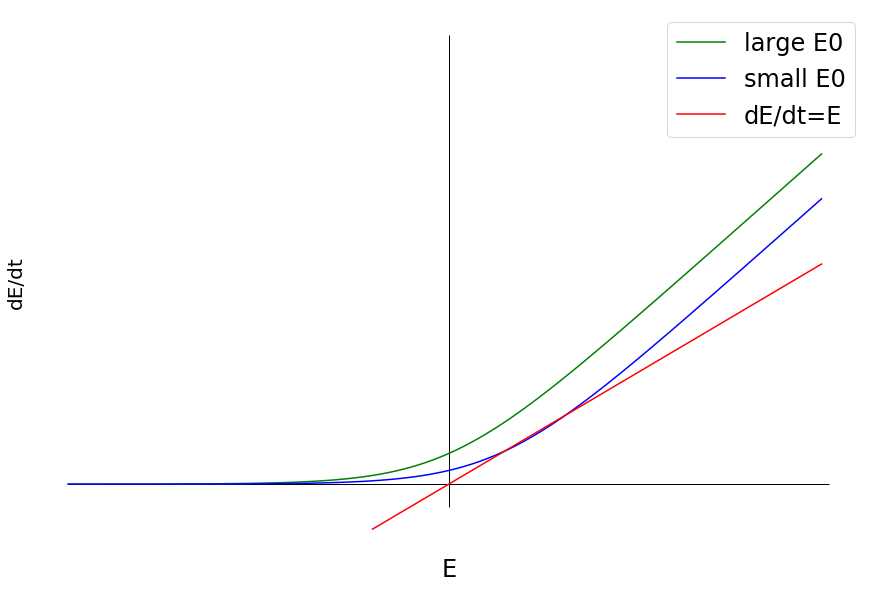

In [81]:
E0_effect_0 = np.zeros(T)
E0_effect_0 = gain_function_(1.5*time)
E0_effect_1 = np.zeros(T)
E0_effect_1 = gain_function_(1.5*time-1)
dE_E = time

plt.clf()
pp = PdfPages('E0_effect_with_E.pdf')
fig = plt.figure(figsize=(15,10))
plt.plot(time, E0_effect_0, label="large E0",color="green")
plt.plot(time, E0_effect_1, label = "small E0",color="blue")
plt.plot(time[40:], dE_E[40:], label = "dE/dt=E", color="red")
plt.legend(loc="upper right",fontsize=24)

plt.xlabel("E",fontsize=24)
plt.ylabel("dE/dt",fontsize=20)
plt.xticks(color="None")
plt.yticks(color="None")
#plt.tick_params(color)

ax = plt.gca()
ax.spines["right"].set_color("None")
ax.spines["left"].set_color("None")
ax.spines["bottom"].set_color("None")
ax.spines["top"].set_color("None")
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
#box("off")

#xticks = np.array([""])
plt.vlines([0],-0.5,10,linestyle="-",lw=1)
plt.hlines([0],-5,5,linestyle="-",lw=1)

plt.show()
pp.savefig(fig, bbox_inches="tight", pad_inches=0.0)
pp.close()

/Users/soliton/.pyenv/versions/anaconda3-4.2.0/envs/dynamicsenv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

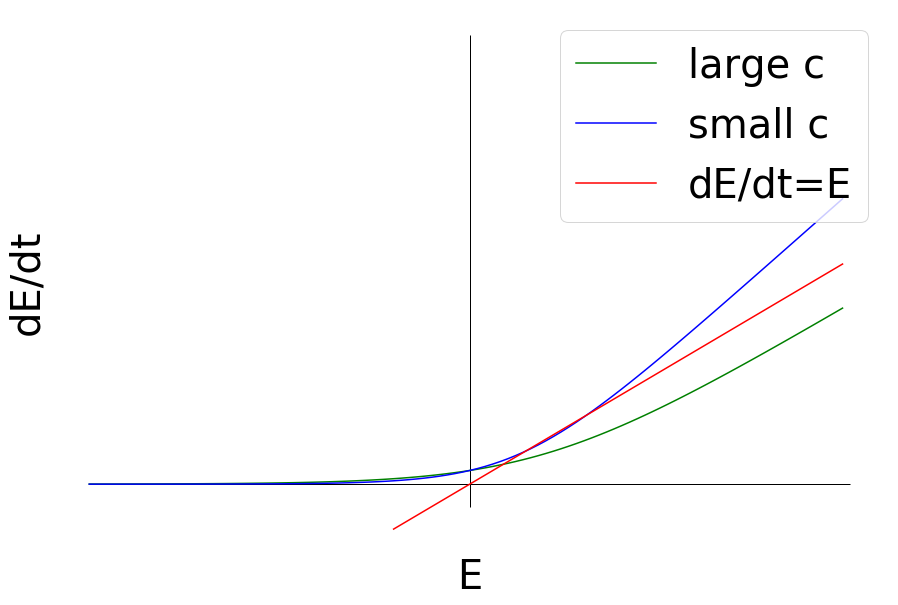

In [4]:
z_E_approx_c_effect_0 = np.zeros(T)
z_E_approx_c_effect_0 = gain_function_(time-1)
z_E_approx_c_effect_1 = np.zeros(T)
z_E_approx_c_effect_1 = gain_function_(1.5*time-1)
dE_E = time

plt.clf()
pp = PdfPages('z_E_approx_c_effect_with_E.pdf')
fig = plt.figure(figsize=(15,10))
plt.plot(time, z_E_approx_c_effect_0, label="large c",color="green")
plt.plot(time, z_E_approx_c_effect_1, label = "small c",color="blue")
plt.plot(time[40:], dE_E[40:], label = "dE/dt=E", color="red")
plt.legend(loc="upper right",fontsize=40)

plt.xlabel("E",fontsize=40)
plt.ylabel("dE/dt",fontsize=40)
plt.xticks(color="None")
plt.yticks(color="None")
#plt.tick_params(color)

ax = plt.gca()
ax.spines["right"].set_color("None")
ax.spines["left"].set_color("None")
ax.spines["bottom"].set_color("None")
ax.spines["top"].set_color("None")
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
#box("off")

#xticks = np.array([""])
plt.vlines([0],-0.5,10,linestyle="-",lw=1)
plt.hlines([0],-5,5,linestyle="-",lw=1)

plt.show()
pp.savefig(fig, bbox_inches="tight", pad_inches=0.0)
pp.close()

/Users/soliton/.pyenv/versions/anaconda3-4.2.0/envs/dynamicsenv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

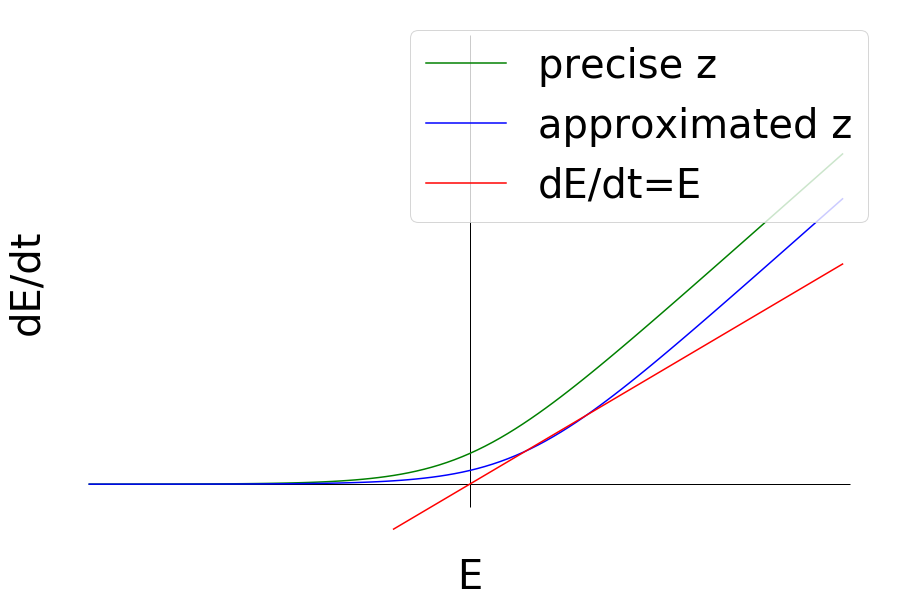

In [5]:
z_effect_0 = np.zeros(T)
z_effect_0 = gain_function_(1.5*time-0)
z_effect_1 = np.zeros(T)
z_effect_1 = gain_function_(1.5*time-1)
dE_E = time

plt.clf()
pp = PdfPages('z_effect_with_E.pdf')
fig = plt.figure(figsize=(15,10))
plt.plot(time, z_effect_0, label="precise z",color="green")
plt.plot(time, z_effect_1, label = "approximated z",color="blue")
plt.plot(time[40:], dE_E[40:], label = "dE/dt=E", color="red")
plt.legend(loc="upper right",fontsize=40)

plt.xlabel("E",fontsize=40)
plt.ylabel("dE/dt",fontsize=40)
plt.xticks(color="None")
plt.yticks(color="None")
#plt.tick_params(color)

ax = plt.gca()
ax.spines["right"].set_color("None")
ax.spines["left"].set_color("None")
ax.spines["bottom"].set_color("None")
ax.spines["top"].set_color("None")
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
#box("off")

#xticks = np.array([""])
plt.vlines([0],-0.5,10,linestyle="-",lw=1)
plt.hlines([0],-5,5,linestyle="-",lw=1)

plt.show()
pp.savefig(fig, bbox_inches="tight", pad_inches=0.0)
pp.close()

/Users/soliton/.pyenv/versions/anaconda3-4.2.0/envs/dynamicsenv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

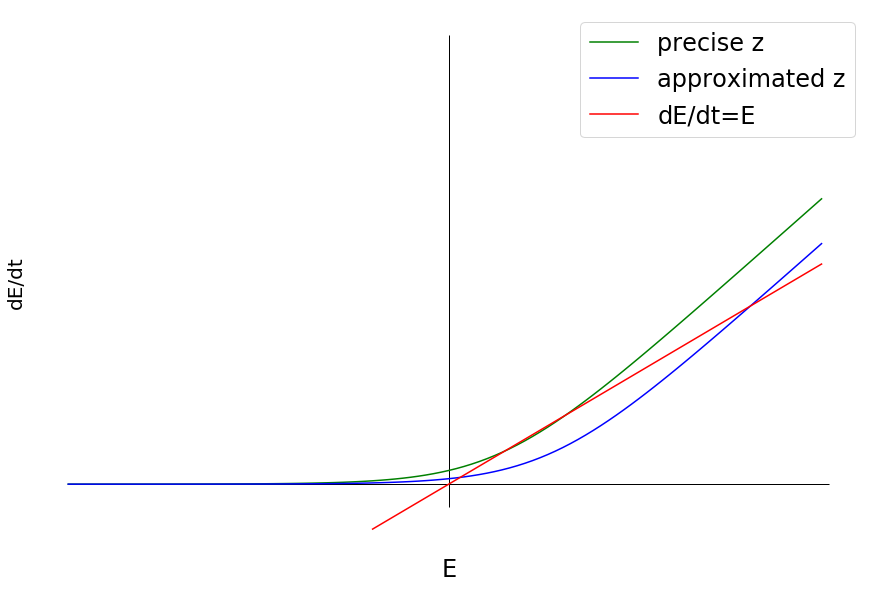

In [87]:
z_effect_0 = np.zeros(T)
z_effect_0 = gain_function_(1.5*time-1)
z_effect_1 = np.zeros(T)
z_effect_1 = gain_function_(1.5*time-2)
dE_E = time

plt.clf()
pp = PdfPages('z_comapr_with_E.pdf')
fig = plt.figure(figsize=(15,10))
plt.plot(time, z_effect_0, label="precise z",color="green")
plt.plot(time, z_effect_1, label = "approximated z",color="blue")
plt.plot(time[40:], dE_E[40:], label = "dE/dt=E", color="red")
plt.legend(loc="upper right",fontsize=24)

plt.xlabel("E",fontsize=24)
plt.ylabel("dE/dt",fontsize=20)
plt.xticks(color="None")
plt.yticks(color="None")
#plt.tick_params(color)

ax = plt.gca()
ax.spines["right"].set_color("None")
ax.spines["left"].set_color("None")
ax.spines["bottom"].set_color("None")
ax.spines["top"].set_color("None")
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
#box("off")

#xticks = np.array([""])
plt.vlines([0],-0.5,10,linestyle="-",lw=1)
plt.hlines([0],-5,5,linestyle="-",lw=1)

plt.show()
pp.savefig(fig, bbox_inches="tight", pad_inches=0.0)
pp.close()